In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
zom = pd.read_csv('Zomato data .csv')

In [5]:
zom.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Here, we can see that the rate is given in fractions. To convert that into floats, we will define a function.

In [6]:
zom.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
def rateFloat(r):
  r = str(r).split('/')
  r = r[0]
  return float(r)

In [9]:
zom['rate'] = zom['rate'].apply(rateFloat)

In [45]:
zom.rename(columns = {'listed_in(type)':'Type', 'approx_cost(for two people)':'approx_cost_couple'}, inplace = True)

In [46]:
#after conversion and renaming
zom.head()

,name,online_order,book_table,rate,votes,approx_cost_couple,Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [47]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                148 non-null    object 
 1   online_order        148 non-null    object 
 2   book_table          148 non-null    object 
 3   rate                148 non-null    float64
 4   votes               148 non-null    int64  
 5   approx_cost_couple  148 non-null    int64  
 6   Type                148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

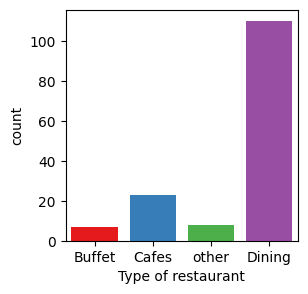

In [57]:
plt.figure(figsize=(3,3))
sns.countplot(x=zom['Type'], saturation=1, hue= zom['Type'], palette = "Set1")
plt.xlabel("Type of restaurant")

Majority restaurants are dinning type

Text(0, 0.5, 'Votes')

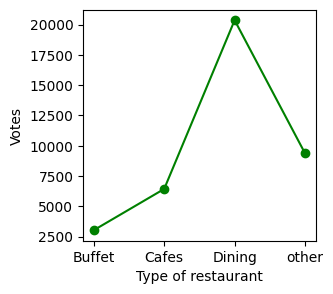

In [36]:
grouped_data = zom.groupby('Type')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.figure(figsize=(3,3))
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="black", size=10)
plt.ylabel("Votes", c="black", size=10)

Most preferred restaurants are dining!

In [38]:
most_preferred = zom['votes'].max()
restaurant_with_max_votes = zom.loc[zom['votes'] == most_preferred, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Empire restaurant got maximum votes (38)

<Axes: xlabel='online_order', ylabel='count'>

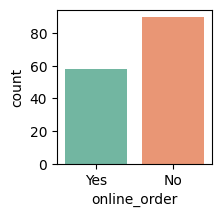

In [56]:
plt.figure(figsize=(2,2))
sns.countplot(x=zom['online_order'], hue=zom['online_order'], palette = "Set2")


Online services are opted by less number of customers

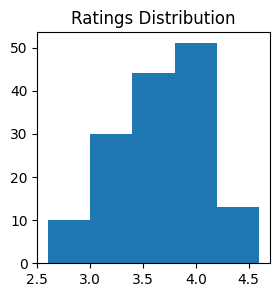

In [44]:
plt.figure(figsize=(3,3))
plt.hist(zom['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

3.5 to 4.0 is maximum rated range

<Axes: xlabel='approx_cost_couple', ylabel='count'>

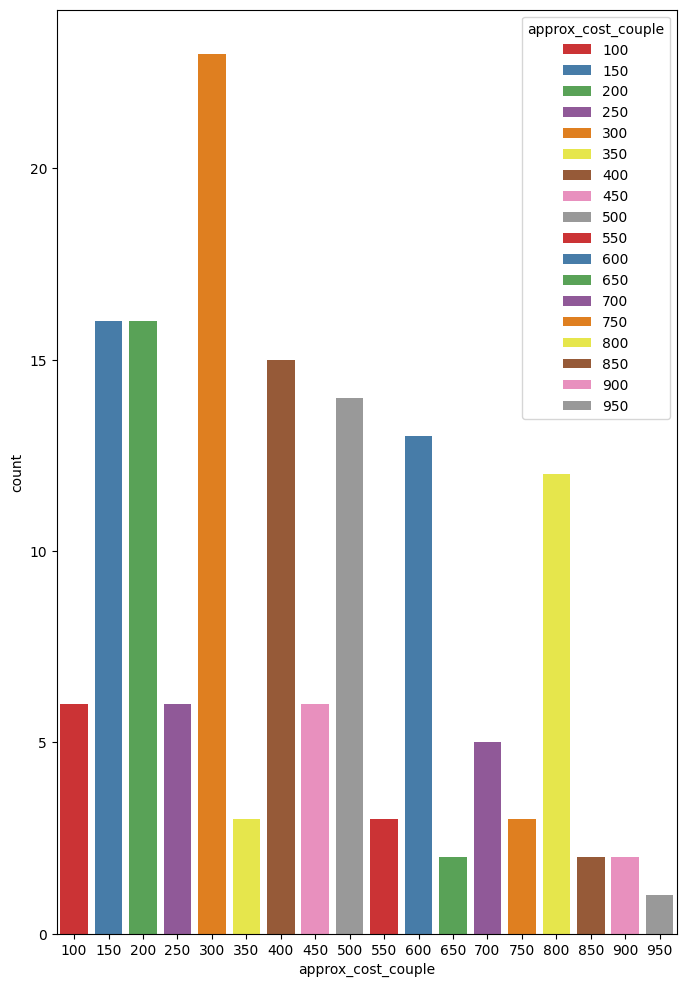

In [55]:
plt.figure(figsize=(8,12))
couple_data=zom['approx_cost_couple']
sns.countplot(x=couple_data, hue=zom['approx_cost_couple'], palette="Set1")

300

<Axes: xlabel='online_order', ylabel='rate'>

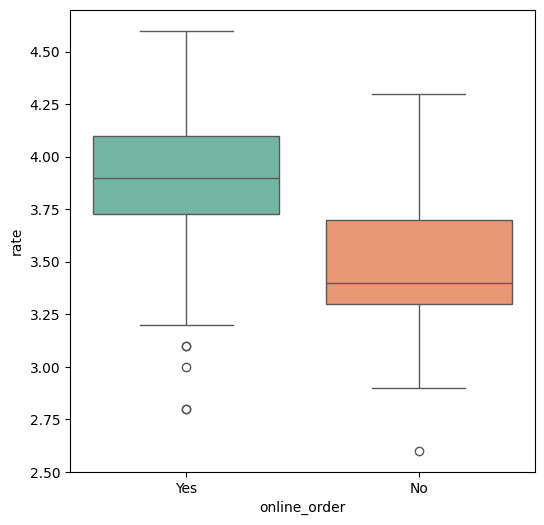

In [59]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = zom, hue=zom['online_order'], palette='Set2')

Offline orders received lower ratings than online orders, which obtained excellent ratings.

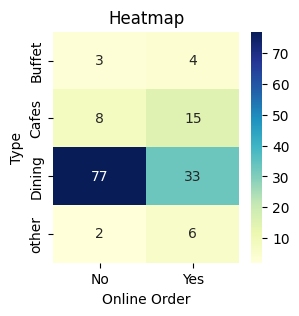

In [62]:
pivot_table = zom.pivot_table(index='Type', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(3,3))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Type")
plt.show()

Customers in dining restaurants prefer offline services, whereas online services are more frequent in cafes.

The most favoured restaurant is Empire Rest.

Price Range: 300